In [1]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 1.2 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638600 sha256=6029e7769a5287d5cdaeff8c2b7c940d6c68a49a506dea0d35ffdefa4ff87c8a
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.4
    Uninstalling cmdstanpy-1.0.4:
      Successfully uninstalled cmdstanpy-1.0.4
ERROR: pip's dependency resolver does not currently take into account all the 

In [10]:
# import all the necessary libraries
import pandas as pd # data manipulation and analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px #data visualization
from fbprophet import Prophet # forcasting

# Importing the Dataset and Exploring it

In [3]:
# import TSLA.csv(downloaded from yahoo finance)
dataset = pd.read_csv("/content/drive/MyDrive/TSLA.csv")

In [4]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-03,719.000000,722.650024,701.010010,709.739990,709.739990,21620300
1,2021-08-04,711.000000,724.900024,708.929993,710.919983,710.919983,17002600
2,2021-08-05,716.000000,720.950012,711.409973,714.630005,714.630005,12919600
3,2021-08-06,711.900024,716.330017,697.630005,699.099976,699.099976,15623000
4,2021-08-09,710.169983,719.030029,705.130005,713.760010,713.760010,14715300


In [5]:
dataset.shape

(252, 7)

we are going to use "Close" Prize for Data Visualization and Analysis because it has accurate representation and standard over the whole finance industry.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [7]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,876.060079,897.300116,853.477303,875.452894,875.452894,2.612302e+07
std,152.908653,156.700353,146.520830,151.480172,151.480172,8.991627e+06
min,623.849976,653.919983,620.570007,628.159973,628.159973,9.800600e+06
25%,734.952499,755.775009,724.020004,736.132508,736.132508,1.986928e+07
50%,853.894989,876.059998,830.505005,859.484985,859.484985,2.510195e+07
75%,1007.099991,1034.872467,983.725021,1009.417511,1009.417511,3.081810e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,6.285210e+07


# Data Visualization using plotly express - Visualizing the historical performance of Tesla

In [ ]:
# line graph, Area graph, Box plot (Analyzing price and volume)

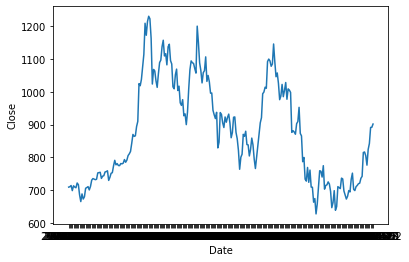

In [11]:
# line graph
sb.lineplot(x="Date", y="Close", data=dataset)

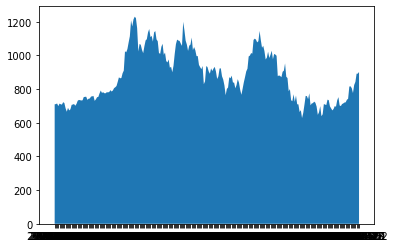

In [12]:
# Area Graph
plt.stackplot(dataset.Date, dataset.Close)

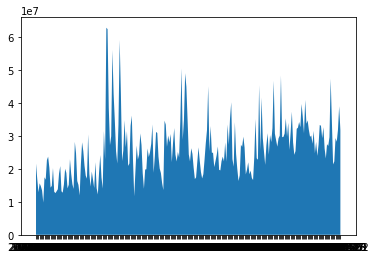

In [13]:
# Area Graph
plt.stackplot(dataset.Date, dataset.Volume)

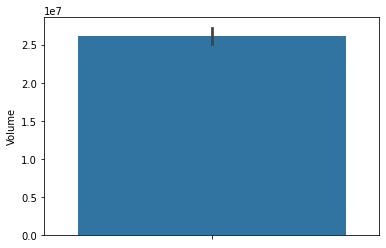

In [14]:
# # Bar Graph
# px.bar(dataset, y="Volume")
sb.barplot(y = 'Volume',
            data = dataset)

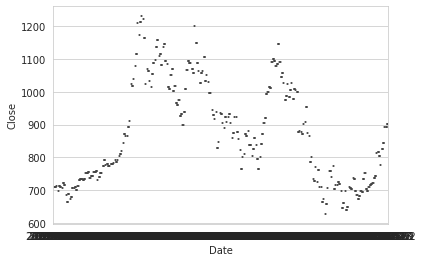

In [17]:
# box plot
sb.set_style("whitegrid") 
sb.boxplot(x = 'Date', y = 'Close', data = dataset)

# Data Preparation

In [18]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-03,719.000000,722.650024,701.010010,709.739990,709.739990,21620300
1,2021-08-04,711.000000,724.900024,708.929993,710.919983,710.919983,17002600
2,2021-08-05,716.000000,720.950012,711.409973,714.630005,714.630005,12919600
3,2021-08-06,711.900024,716.330017,697.630005,699.099976,699.099976,15623000
4,2021-08-09,710.169983,719.030029,705.130005,713.760010,713.760010,14715300


In [19]:
columns=['Date','Close']
new_dataset = pd.DataFrame(dataset,columns=columns)
new_dataset.head()

,Date,Close
0,2021-08-03,709.739990
1,2021-08-04,710.919983
2,2021-08-05,714.630005
3,2021-08-06,699.099976
4,2021-08-09,713.760010


In [20]:
prophet_dataset = new_dataset.rename(columns={'Date':'ds','Close':'y'})
prophet_dataset.head()

,ds,y
0,2021-08-03,709.739990
1,2021-08-04,710.919983
2,2021-08-05,714.630005
3,2021-08-06,699.099976
4,2021-08-09,713.760010


# Creating a Facebook Prophet Model

In [21]:
model = Prophet()
model.fit(prophet_dataset)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Forcasting

In [22]:
future = model.make_future_dataframe(periods=30) # Make dataframe with future dates for forecasting.
# periods->Int number of periods to forecast forward.
forecast = model.predict(future)

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-03,663.111025,525.727690,778.374990,663.111025,663.111025,-7.519976,-7.519976,-7.519976,-7.519976,-7.519976,-7.519976,0.0,0.0,0.0,655.591050
1,2021-08-04,666.623184,531.045689,780.207519,666.623184,666.623184,-7.317854,-7.317854,-7.317854,-7.317854,-7.317854,-7.317854,0.0,0.0,0.0,659.305330
2,2021-08-05,670.135343,529.727624,781.935495,670.135343,670.135343,-13.668965,-13.668965,-13.668965,-13.668965,-13.668965,-13.668965,0.0,0.0,0.0,656.466378
3,2021-08-06,673.647502,534.579897,786.467926,673.647502,673.647502,-16.944191,-16.944191,-16.944191,-16.944191,-16.944191,-16.944191,0.0,0.0,0.0,656.703312
4,2021-08-09,684.183979,571.602466,804.199786,684.183979,684.183979,0.450766,0.450766,0.450766,0.450766,0.450766,0.450766,0.0,0.0,0.0,684.634746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2022-08-28,676.458231,577.402532,811.808069,670.917859,682.717433,22.500109,22.500109,22.500109,22.500109,22.500109,22.500109,0.0,0.0,0.0,698.958340
278,2022-08-29,674.955941,553.821287,802.888922,669.074258,681.586698,0.450766,0.450766,0.450766,0.450766,0.450766,0.450766,0.0,0.0,0.0,675.406708
279,2022-08-30,673.453652,541.420526,791.333502,667.197726,680.628366,-7.519976,-7.519976,-7.519976,-7.519976,-7.519976,-7.519976,0.0,0.0,0.0,665.933676
280,2022-08-31,671.951362,537.119060,789.734346,665.476817,679.463064,-7.317854,-7.317854,-7.317854,-7.317854,-7.317854,-7.317854,0.0,0.0,0.0,664.633508


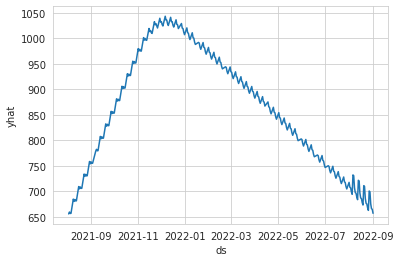

In [25]:
# line graph
sb.lineplot(x="ds", y="yhat", data=forecast)

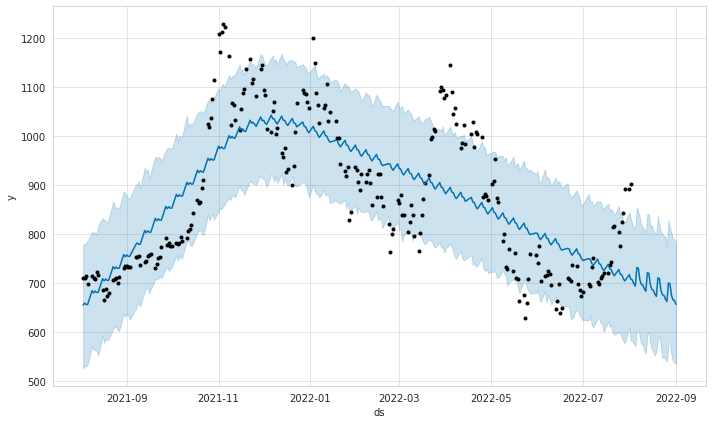

In [26]:
figure = model.plot(forecast, xlabel='ds',ylabel='y')

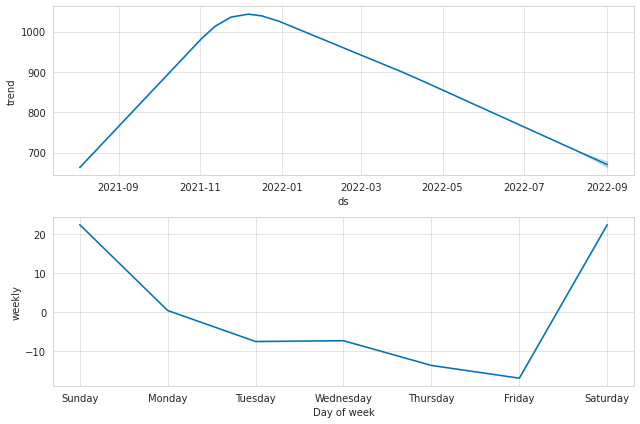

In [27]:
figure2 = model.plot_components(forecast)

# Download the forecast Data

In [28]:
from google.colab import files
forecast.to_csv("forecast.csv")
files.download("forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusion
Based on the estimated trends, we can see that usually the stock price is maximum in early December and mostly on Sunday. Finally, the 1st subplot shows an decrease of the stock price in the near future.